In [30]:
import numpy as np
from scipy.stats import logistic

In [50]:
def display(x_test, y_test):
    test_noise = np.reshape(x_test,(im_size*im_size,1))
    test_orig = np.reshape(y_test,(im_size*im_size*3,1))
    y_hat = NN1.forward(x_test)

    im_noise = np.reshape(test_noise,(im_size,im_size))
    im_out = np.reshape(y_hat,(im_size,im_size,3))
    im_orig = np.reshape(test_orig,(im_size,im_size,3))


    #Plotting figure
    plt.figure()
    plt.subplot(1,3,1)
    plt.imshow(im_orig, cmap='gray')
    plt.title('coloured image')
    plt.subplot(1,3,2)
    plt.imshow(im_noise,cmap='gray')
    plt.title('grayscale image')
    plt.subplot(1,3,3)
    plt.imshow(im_out)
    plt.title('Output image')
    plt.show()
    
    print('loss = %.3e '%(MLP.loss(y_hat,y_test)))

In [39]:
import numpy as np
from math import exp
from scipy.stats import logistic
import random
from sklearn.preprocessing import normalize

class Layer:
    '''
    The class Layer contains the parameters of each layer. Its initialization make them all empty
    '''
    def __init__(self):
        self.W=[] # self.W = the incoming weights
        self.b=[] # self.b = the biases
        self.a=[] # self.a = the activations
        self.z=[] # self.z = the outputs
        self.d_W=[] # self.d_W = the gradient of the incoming weights
        self.d_b=[] # self.d_b = the gradient of the biases
        self.d_a=[] # self.d_a = the gradient of the activations
        self.d_z=[] # self.d_z = the gradient of the outputs

class MLP(Layer): # Multi Layer Perceptron
    def __init__(self, neurons_per_layer):
        '''
        Create the weight matrices for each layer following the neurons_per_layer vector.
        It initializes also the loss and accuracy vector
        
        self.layer[0].W contains the weights which connect input layer 1 with 1st hidden layer. Dimensions [n_1st,n_input]
        self.layer[0].b contains the biases of 1st hidden layer
        self.layer[0].a contains the activation of 1st hidden layer
        self.layer[0].z contains the outputs of 1st hidden layer
        self.layer[0].d_W contains the derivative of loss w.r.t the weights which connect input layer 1 with 1st hidden layer. Dimensions [n_1st,n_input]
        self.layer[0].d_b contains the derivative of loss w.r.t the biases of 1st hidden layer
        self.layer[0].d_a contains the derivative of loss w.r.t the activations of 1st hidden layer
        self.layer[0].d_z contains the derivative of loss w.r.t the outputs of 1st hidden layer
        self.layer[1].W contains the weights which connect 1st hidden layer with 2nd hidden layer. Dimensions [n_2nd,n_1st]
        self.layer[1].b contains the biases of 2nd hidden layer
        ecc...
        self.weights[n] contains the weights which connect nth hidden layer with output layer. Dimensions Dimensions [n_nth,n_output]
        self.biases[n] contains the biases of output layer
        ...
        
        INPUT : 
        - neurons_per_layer : numpy array containing the number of neurons in
            [ input layer, hidden layer1, hidden layer 2, ..., output layer ]
        '''
        super().__init__()
        
        self.layer={}
        
        for i in range(0,len(neurons_per_layer)-1) :
            self.layer[i]=Layer()
            self.layer[i].W=(10**(-1))*np.random.randn(neurons_per_layer[i+1],neurons_per_layer[i])
            self.layer[i].b=np.zeros((1,neurons_per_layer[i+1]))
            self.layer[i].a=np.zeros((1,neurons_per_layer[i+1])) 
            self.layer[i].z=np.zeros((1,neurons_per_layer[i+1]))
            self.layer[i].d_W=np.zeros((neurons_per_layer[i+1],neurons_per_layer[i]))
            self.layer[i].d_b=np.zeros((1,neurons_per_layer[i+1])) 
            self.layer[i].d_a=np.zeros((1,neurons_per_layer[i+1]))
            self.layer[i].d_z=np.zeros((1,neurons_per_layer[i+1]))

        
        self.losses=[]
        self.accuracies=[]
        
    def sigmoid(a) :
        '''
        Sigmoid activation function. It can work with single inputs or vectors or matrices.
        '''
        # logistic.cdf from scipy is used for stability instead of exponential functions
        
        return np.array(logistic.cdf(a)) 
    
    def d_sigmoid(a) :
        '''
        Derivative of sigmoid activation function. It can work with single inputs or vectors or matrices.
        '''
        # use MLP.sigmoid() to generate the derivative sigmoid function
        
        ################# YOUR CODE HERE ####################
        
        return MLP.sigmoid(a)*(1 - MLP.sigmoid(a))  
    
        ################ END OF YOUR CODE HERE ##############
    def batch_norm(x):
        mean = np.mean(x)
        delta_x = x - mean
        var = np.sum((x - mean)**2)/(len(x)-1)
        sqrtvar = np.sqrt(var)
        ivar = 1/sqrtvar
        xhat = delta_x*ivar
        return(xhat)
    
    def forward(self, x) :
        '''
        Forward function. From input layer to output layer. Input can be 1D or 2D.
        
        INPUTS:
        - x : numpy array of size NxD, where N is the number of samples, D is the number of input dimensions referred as n_input before
        
        OUTPUTS:
        - y_hat : numpy array of size NxC, where C is the number of classes
        '''
        
        # write a function which performs the forward operation
        # remember you have len(self.layers) number of layers
        # and each layer has its own parameters:
        # self.layer[0].W are the weights between input and 1st hidden layer
        # self.layer[0].b are the biases of the 1st hidden layer
        # ...
        
        ################# YOUR CODE HERE ####################
        
        y_hat= x
        #print('test')
        #print(x.shape)
        for i in range(len(self.layer)) :
            #print('yo')
            #print(y_hat.shape)
            
            
            
            y_hat = y_hat@self.layer[i].W.transpose() + self.layer[i].b
            self.layer[i].a = y_hat
            #print("av sigmoid=",y_hat)
            #print("W=",self.layer[i].W.transpose() )
            #print("b=",self.layer[i].b)
            y_hat=MLP.sigmoid(y_hat)
            self.layer[i].z = y_hat
            
            # bcs : the output of the k-ieth hidden layer of a sigmoid neuron with inputs x1,x2,. . .,weights w1,w2, . . ., and bias b is :
            #           sigmoid(sum from i=0 to k of Wki.xi + b)
            y_hat= y_hat/255
       
        y_hat = self.layer[len(self.layer)-1].z
        #print(y_hat)
        ################ END OF YOUR CODE HERE ##############
        return y_hat
    
    def loss(y_hat, y) :
        '''
        Compute the loss between y_hat and y! they can be 1D or 2D arrays!
        
        INPUTS:
        - y_hat : numpy array of size NxC, N number of samples, C number of classes. It contains the estimated values of y
        - y : numpy array of size NxC with one 1 in each row, corresponding to the correct class for that sample
        
        OUTPUTS:
        - L : MSE loss
        '''
        
        # compute the mean square loss between y_hat and y
        
        ################# YOUR CODE HERE ####################
        
        
        res, N, C = 0, len(y[0]),len(y[:,0])

        for n in range(N) :
            for k in range(C) :
                res += (y_hat[k,n] - y[k,n])**2
            res *= 1/2
        L= 1/(N) * res
        ################ END OF YOUR CODE HERE ##############

        return L
    
    
    def backpropagation(self,x,y,y_hat,learning_rate) :
        '''
        Backpropagate the error from last layer to input layer and then update the parameters
        
        INPUTS:
        - y_hat : numpy array of size NxC, C number of classes. It contains the estimated values of y
        -y : numpy array of size NxC with correct values of y
        
        OUTPUTS: (compute the error at the different levels and for each layer)
        - d_a
        - d_z
        - delta_L
        - delta_l
        - d_W
        - d_b
        '''
    # compute gradients
        # suggestion compute first the derivatives of elements in final layer,
        # then iterate from the last hidden layers to the second (NOT the first) and compute the derivatives
        # then compute the derivatives in the first hidden layer
    
        ################# YOUR CODE HERE ####################
    
        # We compute the loss derivative
        #print(y_hat)
        #print(y)
        L_derivative = y_hat - y

        # We begin by the last layer (we compute the output error delta_L) :
        last_layer_ind=len(self.layer)-1

        delta_l=L_derivative * MLP.d_sigmoid(self.layer[last_layer_ind].z)#computing the formulas

        self.layer[last_layer_ind].d_b = delta_l
        self.layer[last_layer_ind].d_a = delta_l
        self.layer[last_layer_ind].d_W = np.dot(self.layer[last_layer_ind-1].z.transpose(),delta_l)
        self.layer[last_layer_ind].d_z = np.multiply(delta_l,MLP.d_sigmoid(self.layer[last_layer_ind].a))

        # We compute from the (Last layer -1) to the 1st Hidden Layer
        for l in range(len(self.layer)-2,0, -1):

            delta_l = np.dot(self.layer[l+1].W.transpose(),self.layer[l+1].d_a) * MLP.d_sigmoid(self.layer[l].z) #computing the formulas

            self.layer[l].d_b = delta_l
            self.layer[l].d_a = delta_l
            self.layer[l].d_W = np.dot(delta_l , self.layer[l-1].z.transpose)
            self.layer[l].d_z = np.multiply(delta_l,MLP.d_sigmoid(self.layer[l].a))

        ################ END OF YOUR CODE HERE ##############

        # apply gradients
        # just one for loop passing through all layers is sufficient
        # apply the gradients only to self.layer[i].b and self.layer[i].W

        ################# YOUR CODE HERE ####################

        for i in range(1,len(self.layer)) :
            self.layer[i].W = self.layer[i].W - learning_rate * self.layer[i].d_W.transpose()
            self.layer[i].b = self.layer[i].b - learning_rate * self.layer[i].d_b
        ################ END OF YOUR CODE HERE ##############
        
    def training(self,x,y,learning_rate,num_epochs,verbose=False, print_every_k=1) :
        '''
        Training your network
        
        INPUTS:
        - x : numpy array of size NxD, D number of features of your input
        - y : numpy array of size NxC, C number of classes, with correct values of target
        - learning_rate : a numpy scalar containing your learning rate
        - num_epochs : a numpy scalar representing the number of epochs with which train your networks
        - verbose : a boolean False by default, if True print the training loss and training accuracy values
                    if False only store them
        - print_every_k : a numpy scalar equal 1 by default, if verbose is True print the result every print_every_k epochs

        OUTPUTS: /
        '''
        accuracy=[]
        loss=[]


        
        # iterate for num_epochs number of epochs
        for epoch in range(num_epochs) :
            '''
            # shuffle your training set
            training_data=[x,y]
            random.shuffle(training_data)
            x_shuffled=training_data[0]
            y_shuffled=training_data[1]
            '''
            # shuffle your training set
            shuffle=np.random.permutation(range(x.shape[0]))
            x_shuffled=x[shuffle]
            y_shuffled=y[shuffle]
            
            #print("x_shuffled.shape=", x_shuffled.shape)
            #print(x.shape[0])
            # sample by sample forward and backward through the network using stochastic gradient descent (SGD)
            for sample in range(x.shape[0]) :
                y_hat=self.forward(x_shuffled[sample])
                #print("y_hat=", y_hat)
                self.backpropagation(x_shuffled[sample].reshape(1,x.shape[1]),y_shuffled[sample],y_hat,learning_rate)

        # check how is performing the network after each epoch
            
            # estimate the training labels
            Y_hat=self.forward(x)
            # compute the loss
            loss.append(MLP.loss(Y_hat,y))
            
            # if verbose is True print the results every print_every_k
            if ((verbose == True) and (epoch%print_every_k==0)):
                
                display(x[0],y[0])
                print('Epoch %d : loss = %.5e' %(epoch,loss[epoch]))

        self.losses=loss
        self.accuracies=accuracy

In [40]:
import numpy as np
import scipy
from scipy import misc
from scipy import io
import math

def load_data(ip,op,m,im_size):
    #print(ip[:,0])
    #print(ip[:,0].shape)
    training_inputs = [ip[:,i] for i in range(m)]
    training_results = [op[:,i] for i in range(m)]
    #training_inputs = [training_inputs[i][0] for i in range(m)]
    #training_results = [training_results[i][0] for i in range(m)]
    training_data = (training_inputs, training_results)
    return training_data

In [41]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


In [42]:
import numpy as np
import math 
import os.path
import scipy
import skimage
from skimage import color
from skimage import io
from PIL import Image
import matplotlib.image as mpimg
#import matplotlib.pyplot as plt

def reader(m, im_size):    
    op = np.zeros((im_size*im_size*3,m)) #flattened output
    ip = np.zeros((im_size*im_size,m)) #flattened input
    image_grarray = np.zeros((im_size,im_size,m)) #grayscale image array
    image_array = np.zeros((im_size,im_size,3,m)) #original image array
#    a = ['0000','000','00','0']

    test_data = unpickle("../cifar-10-batches-py/test_batch")
    
    image_dataset = test_data[b'data']
    for k in range(1,m+1):
        

        img = image_dataset[k-1]
        
        img = np.array(img)

        #print(img.shape)
        imgR = img[:1024].reshape(32,32)
        imgG = img[1024:2048].reshape(32,32)
        imgB = img[2048:3072].reshape(32,32)
        

        img_RGB = np.zeros((32,32,3), 'uint8')
       
        img_RGB[:,:,0] = imgR
        img_RGB[:,:,1] = imgG
        img_RGB[:,:,2] = imgB
        
        
        #img_RGB = Image.fromarray(img_RGB)
        
        #img.save('myimg.png')
        
        #image = mpimg.imread('/home/users/aravind2/cifar/'+jpgFilename)
        
        image_gray = color.rgb2gray(img_RGB)
        
        image_grarray[:,:,k-1] = image_gray
        image_array[:,:,:,k-1] = img_RGB
        #print(img_RGB)
        #print(len(img_RGB))
        op[:,k-1] = np.reshape(img_RGB,(im_size*im_size*3,))
        ip[:,k-1] = np.reshape(image_gray,(im_size*im_size,))
        
        
    return (ip, op)
    #plt.figure()
    #plt.subplot(2,1,1)
    #plt.imshow(image_array[:,:,:,0]) 
    #plt.title('Original')
    #plt.subplot(2,1,2)
    #plt.imshow(image_grarray[:,:,0],cmap='gray')
    #plt.title('Grayscale')
    #plt.show()

Starting!
TRAINING


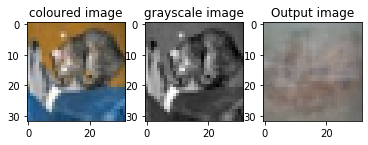

Epoch 0 : loss = 1.39502e-02


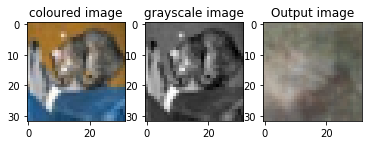

Epoch 20 : loss = 6.01479e-03


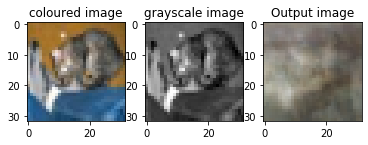

Epoch 40 : loss = 5.05780e-03


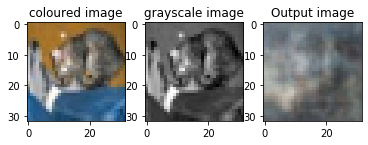

Epoch 60 : loss = 5.04025e-03


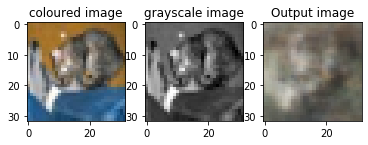

Epoch 80 : loss = 4.50041e-03


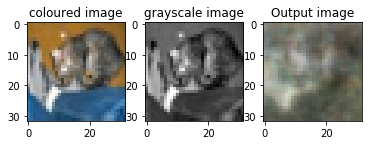

Epoch 100 : loss = 4.11800e-03


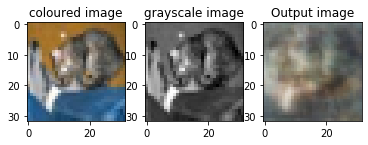

Epoch 120 : loss = 3.76943e-03


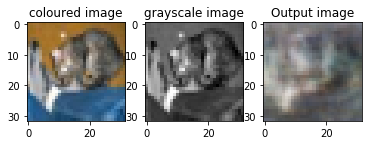

Epoch 140 : loss = 4.73779e-03


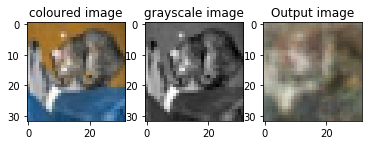

Epoch 160 : loss = 3.89519e-03


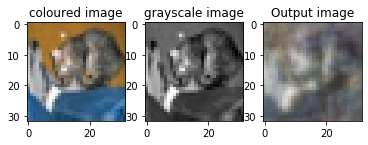

Epoch 180 : loss = 3.74535e-03


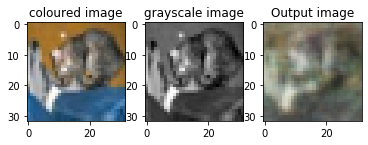

Epoch 200 : loss = 3.29275e-03


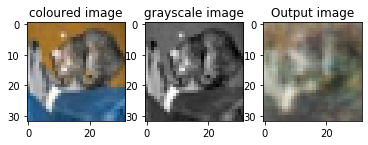

Epoch 220 : loss = 3.23168e-03


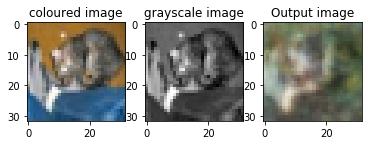

Epoch 240 : loss = 4.03120e-03


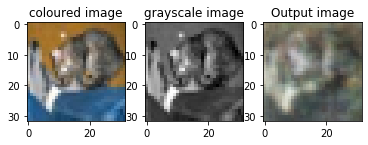

Epoch 260 : loss = 3.18579e-03


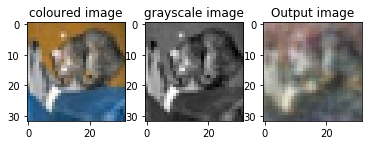

Epoch 280 : loss = 3.04135e-03
[[0.58930282 0.55456016 0.52890719 ... 0.31473017 0.32587087 0.30084885]
 [0.8717996  0.90713497 0.94251383 ... 0.6980835  0.74955744 0.72178655]
 [0.72754179 0.77835494 0.829123   ... 0.100169   0.11195645 0.09857937]
 ...
 [0.61374848 0.65047501 0.59535365 ... 0.22406724 0.22863116 0.1922665 ]
 [0.27834252 0.37336258 0.36213822 ... 0.10937698 0.11977996 0.0997755 ]
 [0.72439339 0.79877898 0.83171641 ... 0.37204768 0.41719742 0.39252788]]
final : loss = 2.940e-03
finished


In [44]:
import sys
import numpy as np
#import matplotlib.pyplot as plt
import pickle


f = open('test.out','w')
#sys.stdout = f
print ('Starting!')
m = 1000 #number of training examples
im_size = 32 #size of image (here 64x64)
#Reading the image files into a matrix

x_train,y_train = reader(m,im_size)
#print(x_train)
#print("y_train",y_train.astype('float'))
#Reshaping the image matrices for the neural network
#import cifar_loader
y_train=y_train/255

#x_test=x_train[:0,:m]
#print(x_test)

training_data = load_data(x_train,y_train,m,im_size)

#print(training_data)

#y =[ training_data[i][1] for i in range(len(training_data))]


x_train=training_data[0]
y_train=training_data[1]

#print(x_train)

x_train=np.asarray(x_train)
y_train=np.asarray(y_train)

#print(y_train)

'''
#print(X)
x_train=[X[:,i] for i in range(m)]
#print(x_train)
y_train=[Y[:,i] for i in range(m)]
#x_test=X[m:,:]
#y_test=y[m:,:]
x_train=np.asarray(x_train)
y_train=np.asarray(y_train)
'''
epochs=300
learning_rate=1
verbose=True
print_every_k=20

# Initialization of the NN

NN1 = MLP([im_size*im_size,1024,im_size*im_size*3])
print('TRAINING')
# Training
NN1.training(x_train,y_train,learning_rate,epochs,verbose,print_every_k)
# Compute the training loss and accuracy after having completer the training
#NN1.training(x_train,y_train,learning_rate,epochs,verbose,print_every_k)
# Compute the training loss and accuracy after having completer the training
y_hat=NN1.forward(x_train)
print(y_hat)
print('final : loss = %.3e'%(MLP.loss(y_hat,y_train)))
#Constructing the neural network and training it using SGD


print('finished')


Testing!


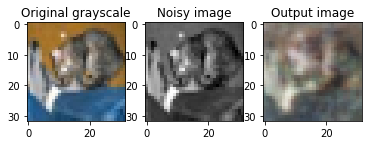

[[0.58930282 0.55456016 0.52890719 ... 0.31473017 0.32587087 0.30084885]
 [0.8717996  0.90713497 0.94251383 ... 0.6980835  0.74955744 0.72178655]
 [0.72754179 0.77835494 0.829123   ... 0.100169   0.11195645 0.09857937]
 ...
 [0.61374848 0.65047501 0.59535365 ... 0.22406724 0.22863116 0.1922665 ]
 [0.27834252 0.37336258 0.36213822 ... 0.10937698 0.11977996 0.0997755 ]
 [0.72439339 0.79877898 0.83171641 ... 0.37204768 0.41719742 0.39252788]]
[[0.61960784 0.43921569 0.19215686 ... 0.08235294 0.2627451  0.43137255]]
loss = 6.345e-06


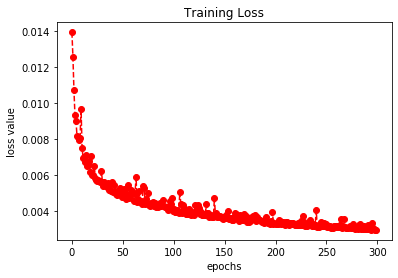

In [46]:
# Testing on 1st image
print ('Testing!')

    
x_test=x_train[0]
#print(x_test)
y_test=y_train[0]
display(x_test, y_test)
def display(x_test, y_test):
    test_noise = np.reshape(x_test,(im_size*im_size,1))
    test_orig = np.reshape(y_test,(im_size*im_size*3,1))
    y_hat = NN1.forward(x_test)

    im_noise = np.reshape(test_noise,(im_size,im_size))
    im_out = np.reshape(y_hat,(im_size,im_size,3))
    im_orig = np.reshape(test_orig,(im_size,im_size,3))


    #Plotting figure
    plt.figure()
    plt.subplot(1,3,1)
    plt.imshow(im_orig, cmap='gray')
    plt.title('Original grayscale')
    plt.subplot(1,3,2)
    plt.imshow(im_noise,cmap='gray')
    plt.title('Noisy image')
    plt.subplot(1,3,3)
    plt.imshow(im_out)
    plt.title('Output image')
    plt.show()

    
#print(y_test)
y_test=[y_test]
y_test=np.asarray(y_test)
#print(y_test)
#print(y_hat)

print(y_hat)
print(y_test)
print('loss = %.3e'%(MLP.loss(y_hat,y_test)))


plt.plot(list(range(epochs)),NN1.losses,c='r',marker='o',ls='--');
plt.title("Training Loss")
plt.xlabel("epochs")
plt.ylabel("loss value")
plt.show()


f.close()

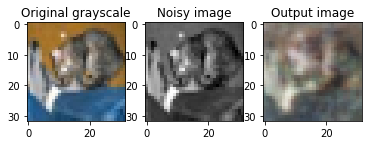

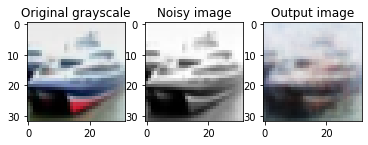

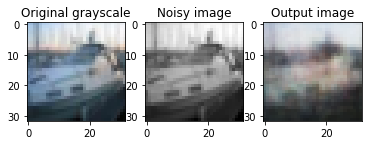

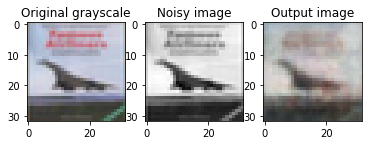

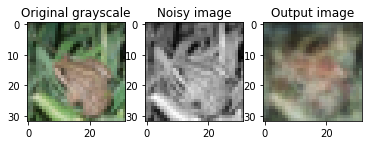

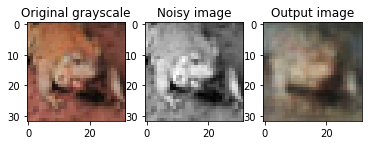

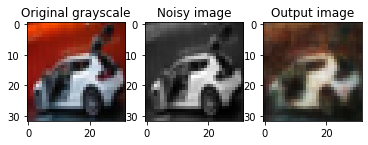

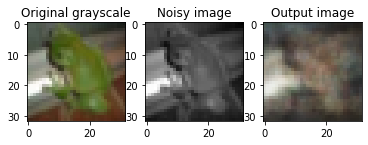

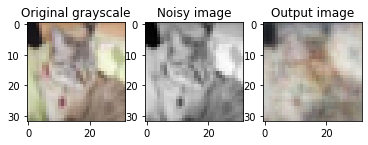

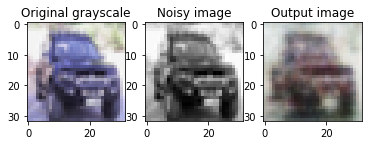

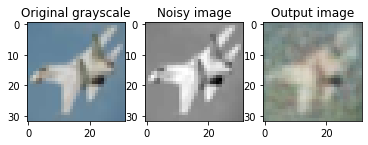

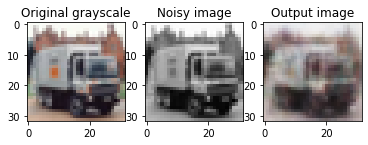

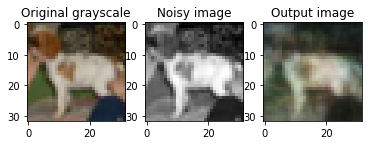

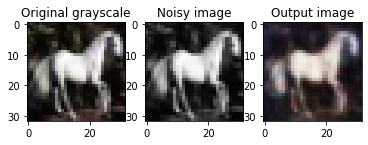

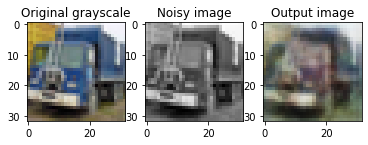

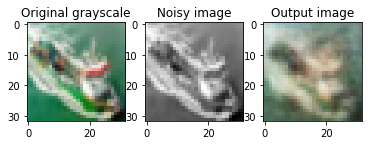

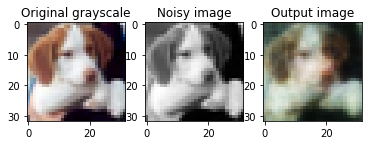

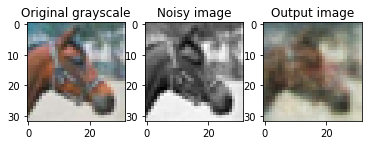

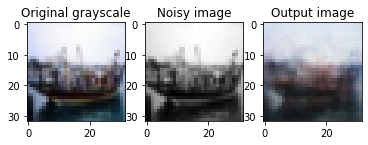

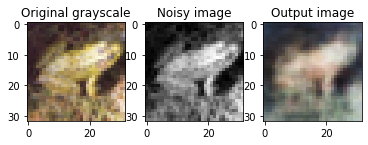

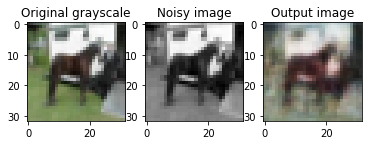

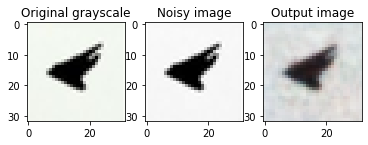

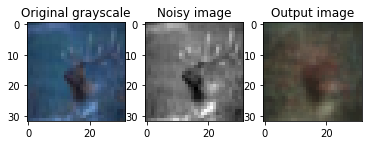

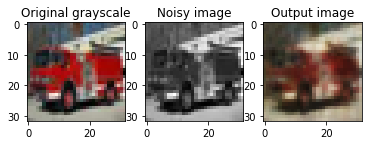

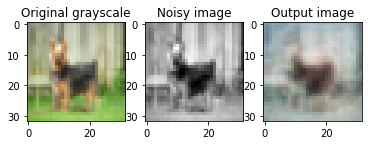

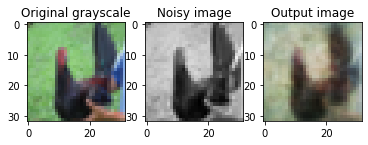

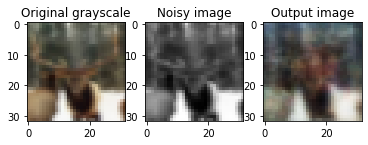

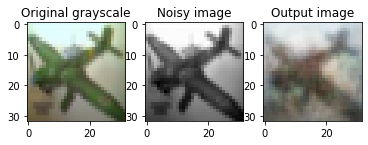

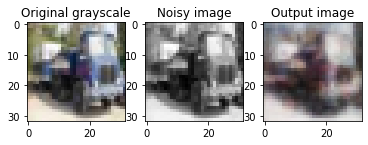

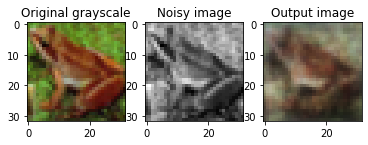

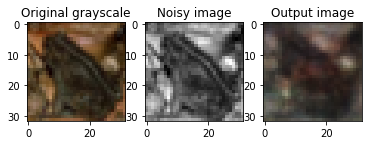

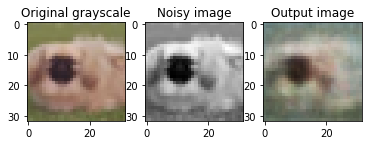

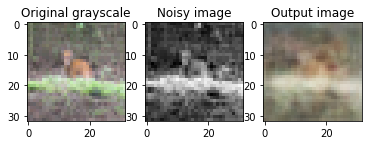

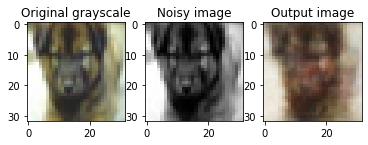

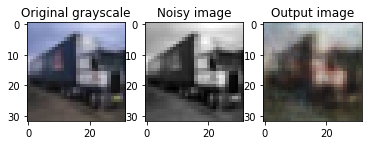

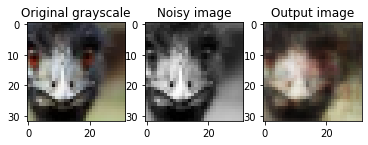

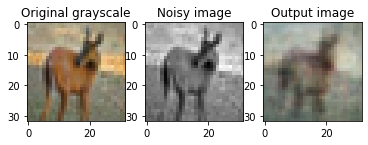

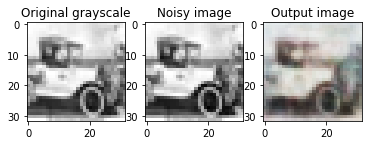

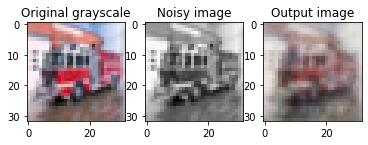

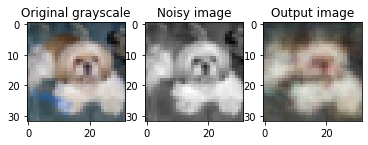

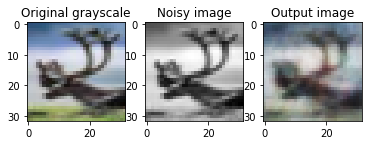

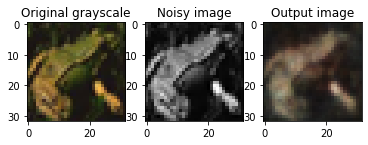

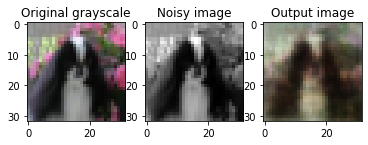

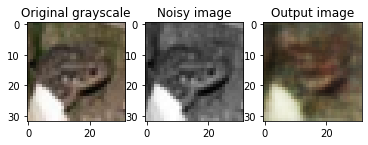

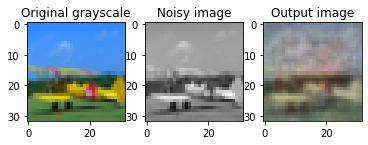

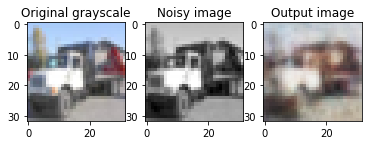

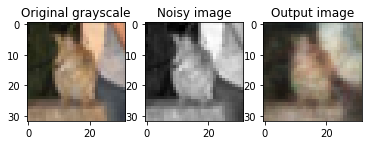

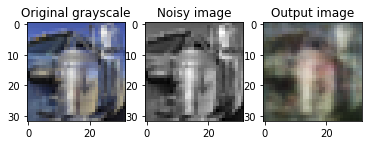

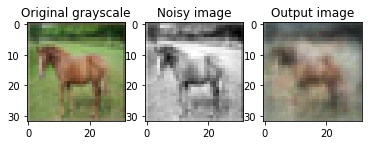

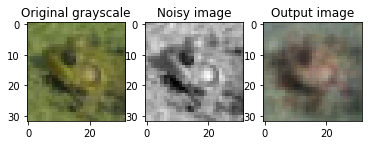

In [54]:
x_test=x_train
y_test=y_train

def display_results(x_test, y_test, nb):
    
    
    for i in range(nb):
        test_noise = np.reshape(x_test[i],(im_size*im_size,1))
        test_orig = np.reshape(y_test[i],(im_size*im_size*3,1))
        y_hat = NN1.forward(x_test[i])

        im_noise = np.reshape(test_noise,(im_size,im_size))
        im_out = np.reshape(y_hat,(im_size,im_size,3))
        im_orig = np.reshape(test_orig,(im_size,im_size,3))
        
        #Plotting figure
        plt.figure()
        plt.subplot(1,3,1)
        plt.imshow(im_orig, cmap='gray')
        plt.title('Original grayscale')
        plt.subplot(1,3,2)
        plt.imshow(im_noise,cmap='gray')
        plt.title('Noisy image')
        plt.subplot(1,3,3)
        plt.imshow(im_out)
        plt.title('Output image')
        plt.show()
        
        
display_results(x_test, y_test,50)


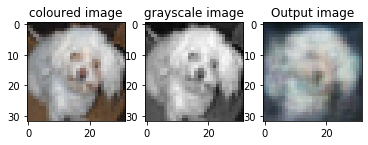

loss = 1.251e-06 


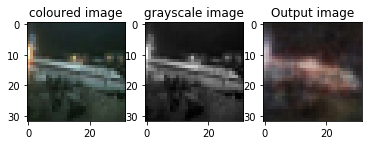

loss = 3.929e-07 


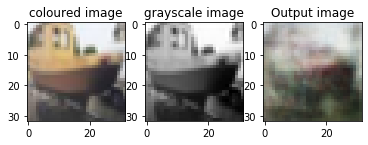

loss = 6.142e-07 


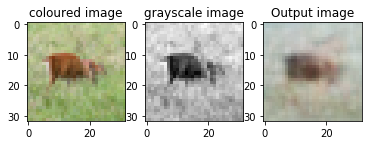

loss = 1.148e-05 


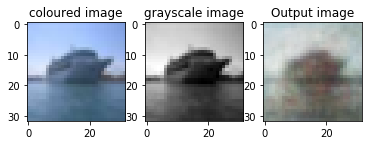

loss = 2.715e-06 


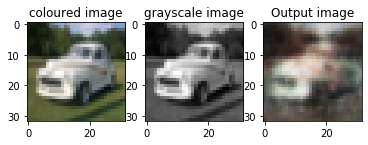

loss = 1.297e-06 


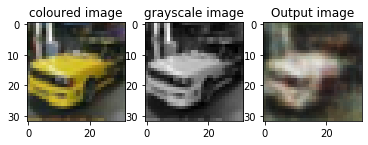

loss = 8.276e-06 


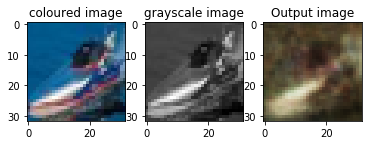

loss = 2.286e-05 


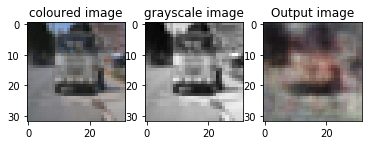

loss = 9.307e-07 


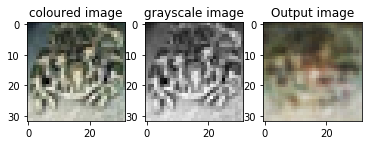

loss = 3.520e-07 


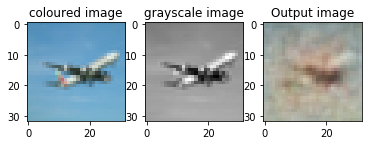

loss = 7.311e-06 


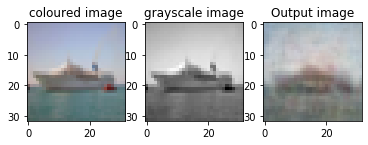

loss = 2.263e-07 


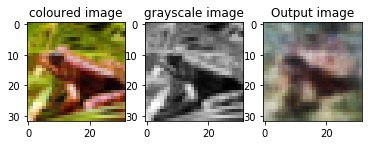

loss = 1.517e-05 


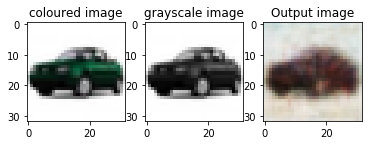

loss = 8.547e-06 


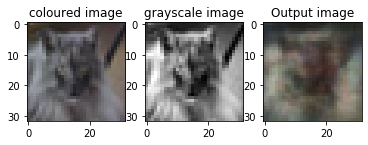

loss = 1.014e-06 


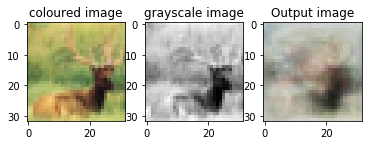

loss = 1.674e-05 


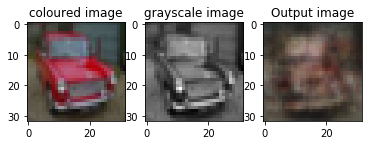

loss = 1.095e-06 


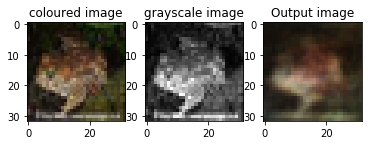

loss = 9.325e-07 


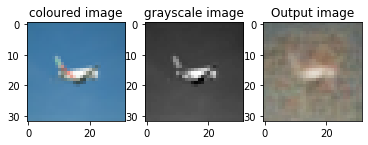

loss = 1.083e-05 


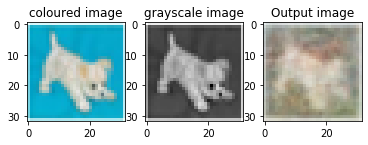

loss = 3.743e-06 


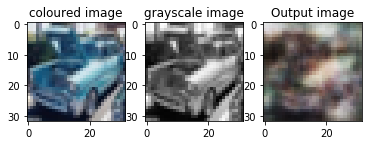

loss = 2.073e-06 


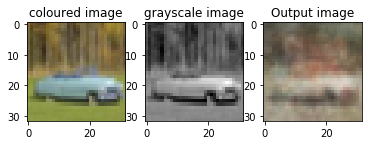

loss = 8.776e-06 


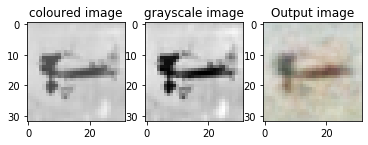

loss = 1.263e-06 


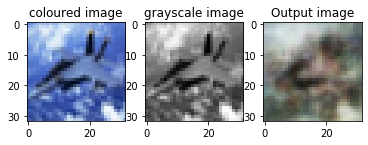

loss = 7.780e-06 


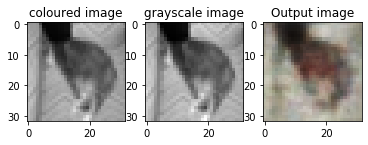

loss = 1.619e-06 


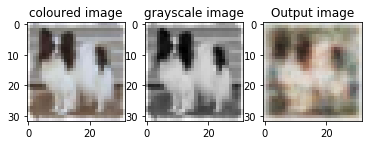

loss = 2.267e-06 


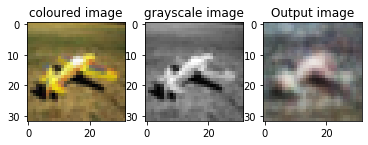

loss = 1.694e-06 


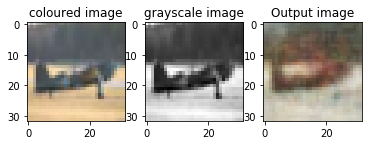

loss = 5.813e-06 


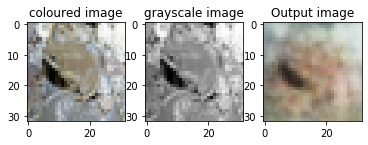

loss = 4.189e-06 


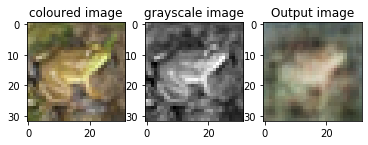

loss = 5.723e-07 


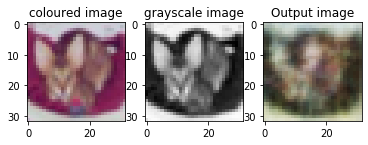

loss = 5.116e-07 


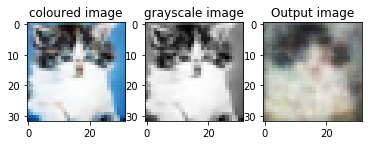

loss = 1.179e-05 


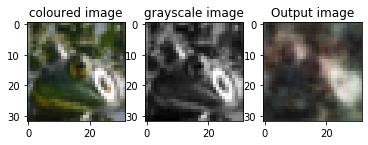

loss = 2.062e-05 


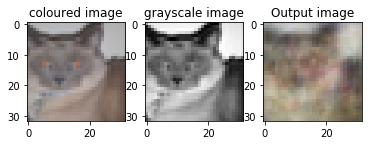

loss = 5.334e-07 


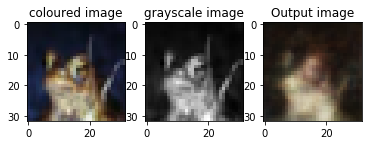

loss = 6.914e-07 


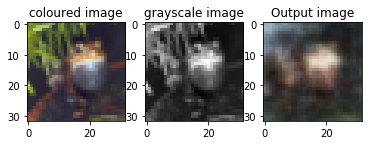

loss = 8.395e-07 


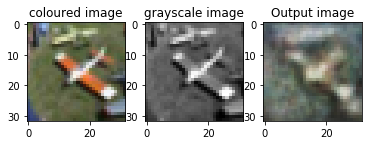

loss = 2.539e-07 


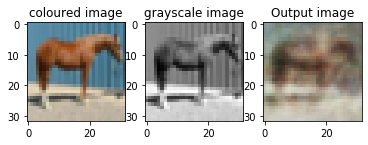

loss = 2.077e-07 


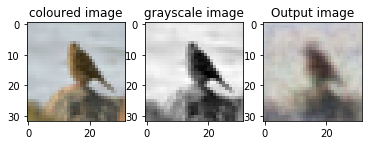

loss = 3.551e-06 


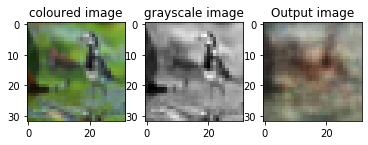

loss = 3.645e-06 


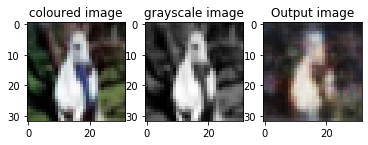

loss = 2.735e-06 


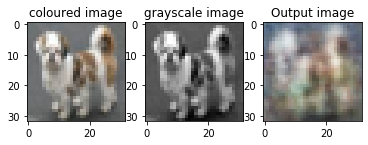

loss = 4.212e-07 


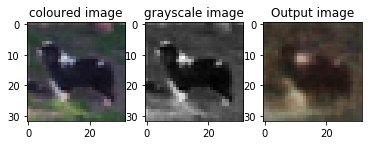

loss = 6.509e-07 


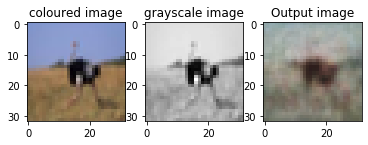

loss = 1.997e-06 


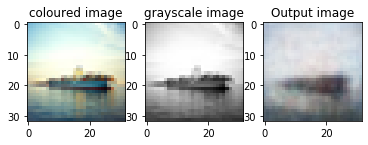

loss = 1.677e-06 


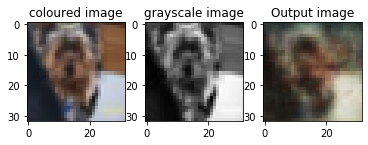

loss = 5.356e-06 


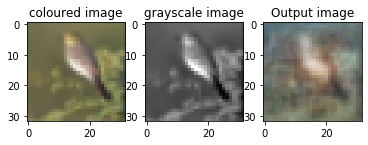

loss = 2.481e-06 


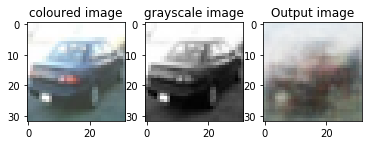

loss = 1.238e-06 


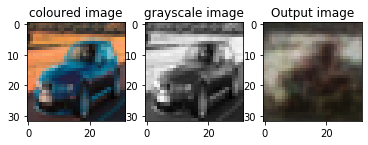

loss = 8.305e-07 


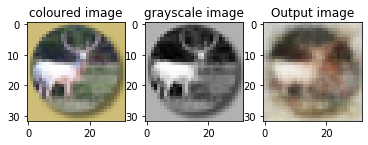

loss = 1.665e-05 


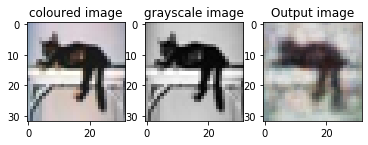

loss = 9.711e-07 


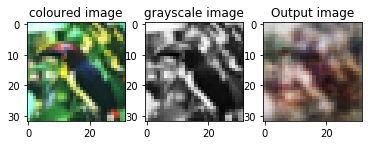

loss = 1.140e-05 


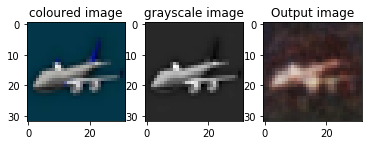

loss = 5.217e-06 


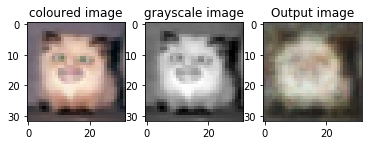

loss = 1.103e-06 


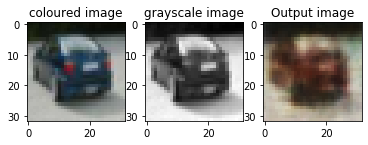

loss = 3.058e-07 


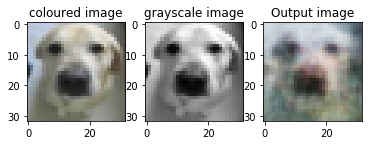

loss = 1.651e-06 


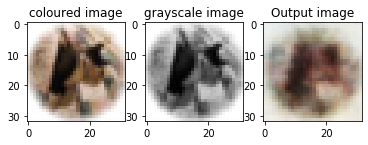

loss = 3.446e-06 


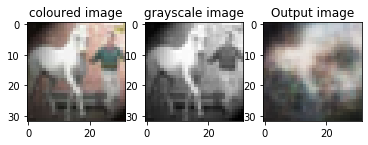

loss = 1.478e-06 


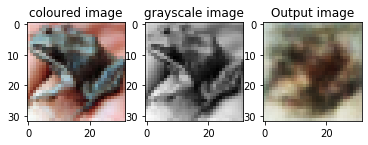

loss = 1.394e-06 


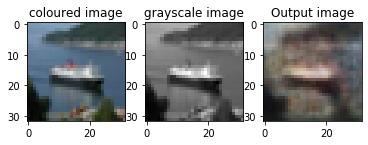

loss = 1.350e-05 


In [55]:
m=60
for k in range (m):
    op = np.zeros((im_size*im_size*3,m)) #flattened output
    ip = np.zeros((im_size*im_size,m)) #flattened input
    test_data = unpickle("../cifar-10-batches-py/test_batch")
    image_dataset = test_data[b'data']

    img = image_dataset[k+1000]
    img = np.array(img)

    #print(img.shape)
    imgR = img[:1024].reshape(32,32)
    imgG = img[1024:2048].reshape(32,32)
    imgB = img[2048:3072].reshape(32,32)


    img_RGB = np.zeros((32,32,3), 'uint8')

    img_RGB[:,:,0] = imgR
    img_RGB[:,:,1] = imgG
    img_RGB[:,:,2] = imgB

    image_gray=color.rgb2gray(img_RGB)

    op[:,0]=np.reshape(img_RGB,(im_size*im_size*3,))
    ip[:,0]=np.reshape(image_gray,(im_size*im_size,))
    x_test,y_test =ip, op

    y_test=y_test/255

    testing_data = load_data(x_test,y_test,1,im_size)


    x_test=testing_data[0]
    y_test=testing_data[1]


    x_test=np.asarray(x_test)
    y_test=np.asarray(y_test)
    
    display(x_test, y_test)
    


In [56]:
a=NN1.layer[0].W
b=NN1.layer[0].b
c=NN1.layer[1].W
d=NN1.layer[1].b

In [57]:
mon_fichier = open("fichier.txt", "w") # Argh j'ai tout écrasé !
mon_fichier.write("NN1.layer[0].W = " + str(a) + "\n")
mon_fichier.write("NN1.layer[0].b = " + str(b) + "\n")
mon_fichier.write("NN1.layer[1].W = " + str(c) + "\n")
mon_fichier.write("NN1.layer[1].b = " + str(d) + "\n")
mon_fichier.close()

In [8]:
test_data = unpickle("../cifar-10-batches-py/test_batch")
image_dataset = test_data[b'data']
len(image_dataset)

NN1 = MLP([im_size*im_size,1024,im_size*im_size*3])

a=
NN1.layer[0].W=a
b=
NN1.layer[0].b=b
c=
NN1.layer[1].W=c
d=
NN1.layer[1].b=d


10000